In [96]:
## Dated November 23, 2023 ####
## link for whole code --- https://rpubs.com/mahima_bose/Seurat_and_Monocle3_p
##################################################
## scRNA monocle analysis ###
##################################################
#Link -- https://cole-trapnell-lab.github.io/monocle3/docs/installation/ ###

## installing required packages ####

# BiocManager::install(c('BiocGenerics', 'DelayedArray', 'DelayedMatrixStats',
#                        'limma', 'lme4', 'S4Vectors', 'SingleCellExperiment',
#                        'SummarizedExperiment', 'batchelor', 'HDF5Array',
#                        'terra', 'ggrastr'))
library(ggplot2)
library(dplyr)
#remotes::install_github('satijalab/seurat-wrappers')
#library(seurat-wrappers)
library(Seurat)
#devtools::install_github('cole-trapnell-lab/monocle3')
library(monocle3)
library(SeuratWrappers)

In [27]:
remotes::install_github('satijalab/seurat-wrappers', force=TRUE)


── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/lscratch/12970711/Rtmpt1dKPX/remotes37d1fb401afdb6/satijalab-seurat-wrappers-872d4b2/DESCRIPTION’ (357ms)
─  preparing ‘SeuratWrappers’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘SeuratWrappers_0.3.2.tar.gz’
   


Installing package into ‘/vf/users/kumarr9/R/rhel8/4.3’
(as ‘lib’ is unspecified)



In [17]:
library(SeuratWrappers)

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


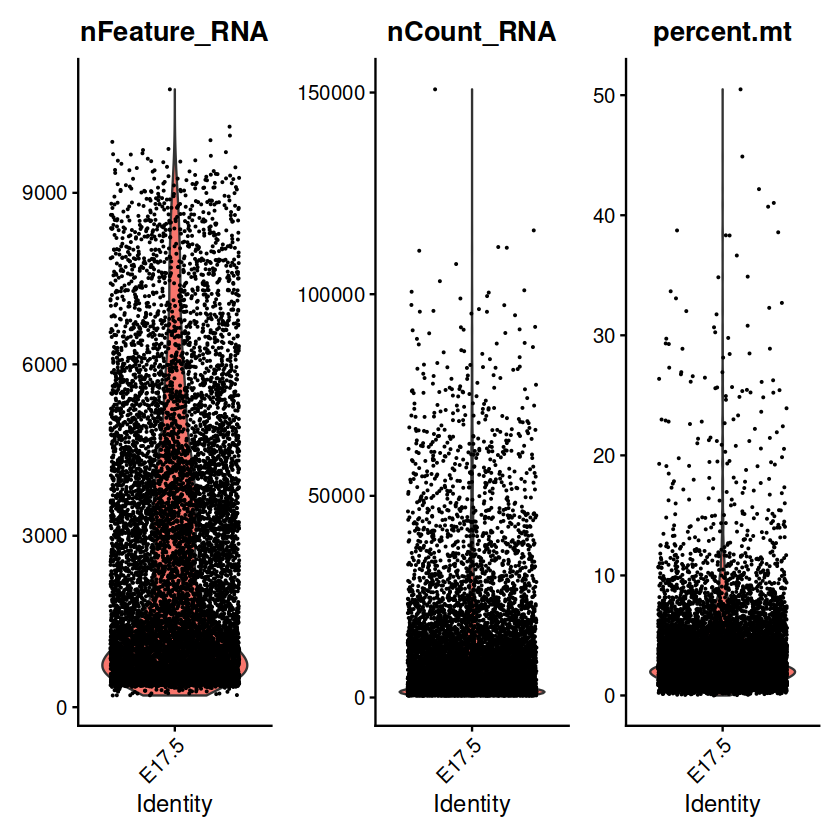

Normalizing layer: counts

Finding variable features for layer counts



[1] "HBB"    "HSPA6"  "APOE"   "GNLY"   "CD74"   "RNASE1" "COL1A1" "TIMP1" 
 [9] "ACTA2"  "TAGLN"

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


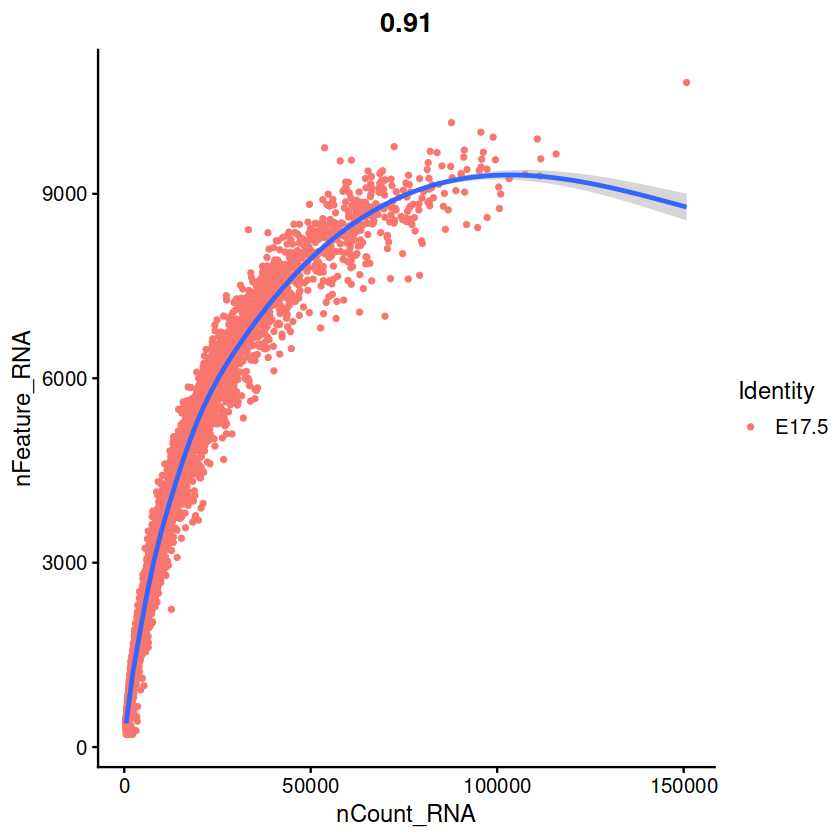

Centering and scaling data matrix

PC_ 1 
Positive:  SEC11C, INSM1, PTTG1, UBE2S, HMGB2, HSP90AA1, ENO1, PCP4, ASCL1, PTMS 
	   TFF3, PERP, MGST1, NUSAP1, TOP2A, IGFBP2, CKS1B, CDC20, TYMS, CCNB1 
	   CALML3, BIK, TPX2, CEACAM6, NUF2, CENPF, CDKN3, SOX4, FABP5, CDCA3 
Negative:  BGN, SPARC, COL1A2, TIMP1, COL6A2, COL3A1, IGFBP7, IFITM3, CALD1, FN1 
	   COL18A1, TPM2, LGALS1, MGP, MYL9, COL4A2, COL6A3, COL4A1, APOE, VIM 
	   COL6A1, POSTN, SERPING1, S100A11, RGS5, CAVIN1, PDLIM3, PLXDC1, TAGLN, THY1 
PC_ 2 
Positive:  PTMS, SEC11C, COL1A2, NDUFA4L2, COL3A1, BGN, MGP, COL6A1, IGFBP2, FN1 
	   COL6A3, MYL9, SPARC, IGFBP5, CALD1, TPM2, POSTN, COL4A2, RGS5, SOX4 
	   COL5A1, COL6A2, HSP90AA1, ID4, IGFBP7, THBS2, COL5A2, AEBP1, CNN3, TPM1 
Negative:  SRGN, PTPRC, CCL5, CD52, IL32, CD3E, CD3D, CST7, IL2RG, RAC2 
	   NKG7, HCST, LAPTM5, TNFAIP3, GZMA, CD8A, LCP1, LSP1, CTSW, ITGB2 
	   CD3G, RGS1, HLA-B, CD7, CREM, TRBC2, CD53, RGCC, GZMM, CXCR4 
PC_ 3 
Positive:  THBS2, POSTN, ABI3BP, COL1A2,

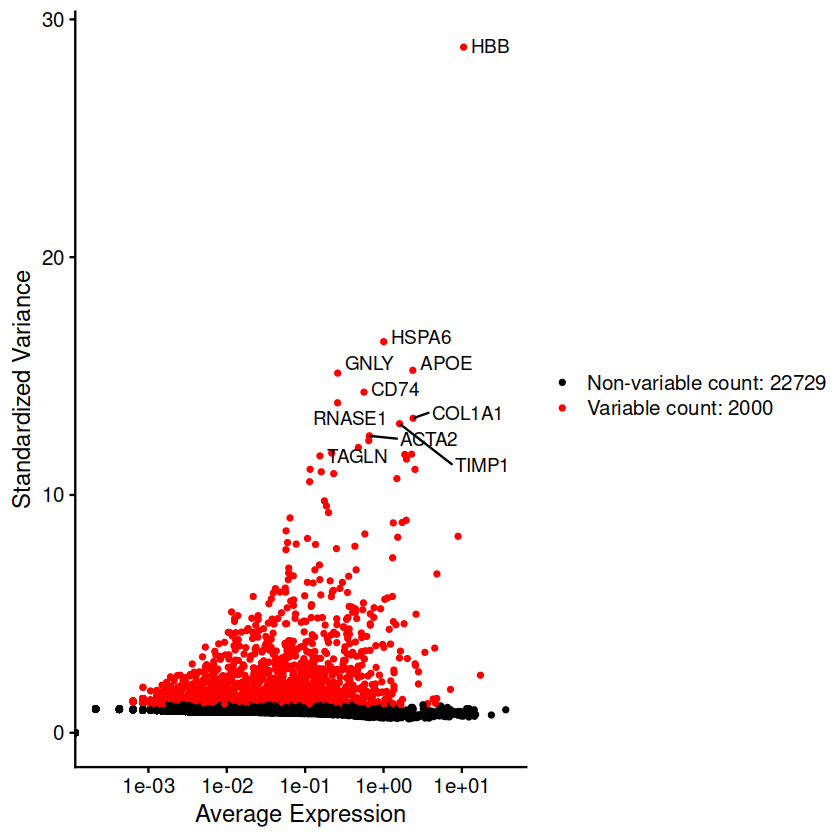

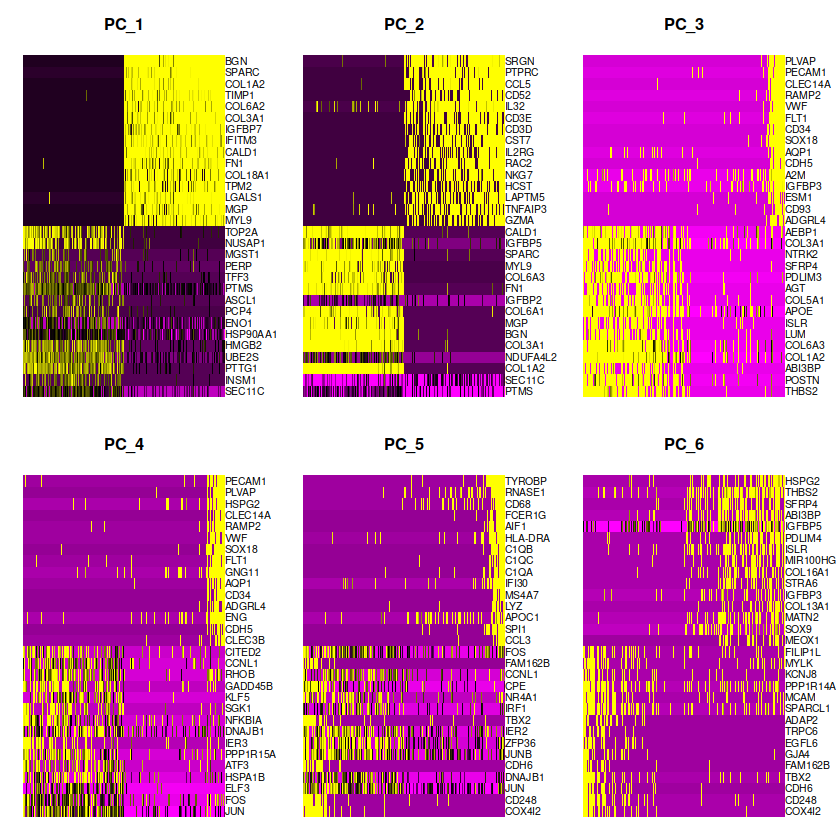

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4695
Number of edges: 168235

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9003
Number of communities: 10
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4695
Number of edges: 168235

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8649
Number of communities: 13
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4695
Number of edges: 168235

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8432
Number of communities: 14
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4695
Number of edges: 168235

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8323
Number of communities: 15
Elapsed time: 0 seconds
Modularity Optim

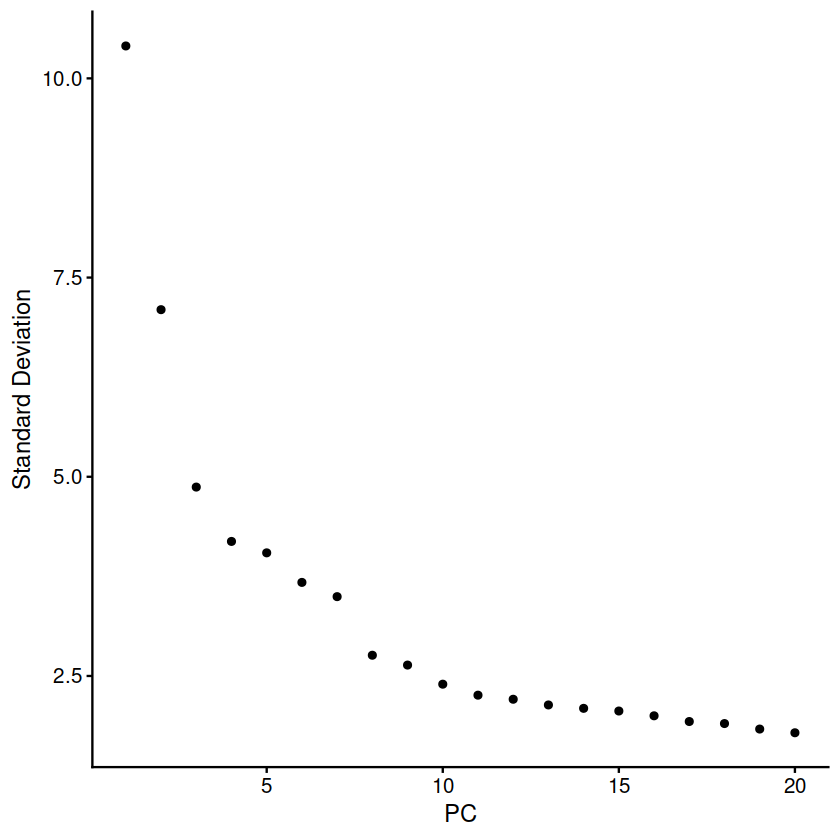

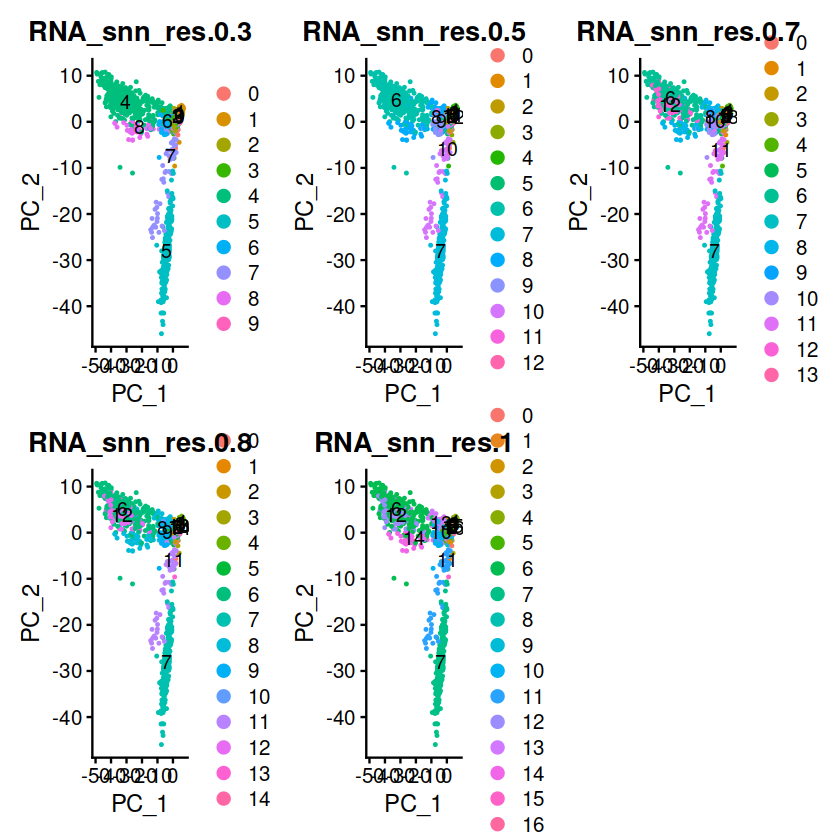

In [73]:
#### Monocle Final code from individual .h5 file ####
# link - https://rpubs.com/mahima_bose/Seurat_and_Monocle3_p
### scRNA dataset preprocessing ####
data <- Read10X_h5("/data/kumarr9/scRNA/SCAF2497_81-67-84-9_filtered_feature_bc_matrix.h5")
data <- CreateSeuratObject(counts = data, project='E17.5', min.cells = 3, min.features = 200)
data[["percent.mt"]] <- PercentageFeatureSet(data, pattern = "^MT-")
VlnPlot(data, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
FeatureScatter(data, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") + geom_smooth()
data <- subset(data, subset = nFeature_RNA >200 & nFeature_RNA <2500 & percent.mt <5)
data <- NormalizeData(data)
data <- FindVariableFeatures(data, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(data), 10)
top10
plot1 <- VariableFeaturePlot(data)
LabelPoints(plot = plot1, points = top10, repel = T)
all.genes <- rownames(data)
data <- ScaleData(data, features = all.genes)
data <- RunPCA(data, features = VariableFeatures(object = data))
DimHeatmap(data, dims = 1:6, cells = 500, balanced = T)
ElbowPlot(data)
data <- FindNeighbors(data, dims = 1:20)
data <- FindClusters(data, resolution = c(0.3, 0.5, 0.7, 0.8, 1))
p1 <- DimPlot(data, group.by = "RNA_snn_res.0.3", label = T)
p2 <- DimPlot(data, group.by = "RNA_snn_res.0.5", label = T)
p3 <- DimPlot(data, group.by = "RNA_snn_res.0.7", label = T)
p4 <- DimPlot(data, group.by = "RNA_snn_res.0.8", label = T)
p5 <- DimPlot(data, group.by = "RNA_snn_res.1", label = T)
p1 + p2 + p3 + p4 +p5
### Modify if needed the cell cycle regression ####

10:38:04 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

10:38:04 Read 4695 rows and found 20 numeric columns

10:38:04 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

10:38:04 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:38:05 Writing NN index file to temp file /lscratch/13047421/RtmpDdvBae/file10582c24082f3d

10:38:05 Searching Annoy index using 1 thread, search_k = 3000

10:38:06 Annoy recall = 100%

10:38:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:38:09 Initializing from normaliz

DataFrame with 6 rows and 12 columns
                   orig.ident nCount_RNA nFeature_RNA percent.mt
                     <factor>  <numeric>    <integer>  <numeric>
AAACCTGAGAGCAATT-1      E17.5       1460          971    4.24658
AAACCTGAGCCATCGC-1      E17.5        843          559    2.13523
AAACCTGAGCCTTGAT-1      E17.5       1890         1406    4.17989
AAACCTGAGGAGTAGA-1      E17.5        569          442    1.40598
AAACCTGCAATGAAAC-1      E17.5        801          570    2.99625
AAACCTGCAGCGAACA-1      E17.5       4056         2107    2.68738
                   RNA_snn_res.0.3 RNA_snn_res.0.5 RNA_snn_res.0.7
                          <factor>        <factor>        <factor>
AAACCTGAGAGCAATT-1               2               2              2 
AAACCTGAGCCATCGC-1               1               3              3 
AAACCTGAGCCTTGAT-1               2               2              2 
AAACCTGAGGAGTAGA-1               2               2              2 
AAACCTGCAATGAAAC-1               2       

DataFrame with 24729 rows and 0 columns

[1] "AL627309.1" "AL627309.3" "AL627309.5" "AP006222.2" "AL732372.1"
 [6] "LINC01409"  "FAM87B"     "LINC01128"  "LINC00115"  "FAM41C"

DataFrame with 6 rows and 1 column
           gene_short_name
               <character>
AL627309.1      AL627309.1
AL627309.3      AL627309.3
AL627309.5      AL627309.5
AP006222.2      AP006222.2
AL732372.1      AL732372.1
LINC01409        LINC01409

  [[ suppressing 4695 column names ‘AAACCTGAGAGCAATT-1’, ‘AAACCTGAGCCATCGC-1’, ‘AAACCTGAGCCTTGAT-1’ ... ]]



6 x 4695 sparse Matrix of class "dgCMatrix"
                                                                              
AL627309.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.5 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AP006222.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL732372.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
LINC01409  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                                                              
AL627309.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.5 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AP006222.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL732372

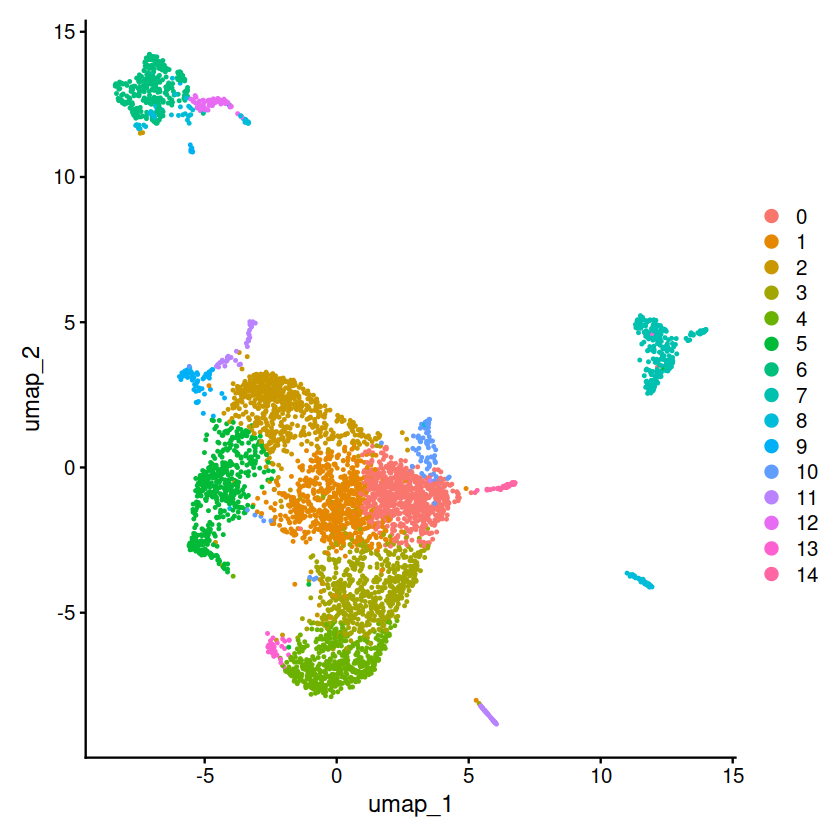

In [74]:
# setting the identity to the cluster 
Idents(data) <- "RNA_snn_res.0.8"
data <- RunUMAP(data, dims = 1:20)
DimPlot(data, reduction = "umap")


### Monocle analysis starts from here ####
cds <- as.cell_data_set(data)
head(colData(cds))
# getting features of the data
fData(cds)
rownames(fData(cds))[1:10]
fData(cds)$gene_short_name <- rownames(fData(cds))
head(fData(cds))
head(counts(cds))

AAACCTGAGAGCAATT-1 AAACCTGAGCCATCGC-1 AAACCTGAGCCTTGAT-1 AAACCTGAGGAGTAGA-1 
                 1                  1                  1                  1 
AAACCTGCAATGAAAC-1 AAACCTGCAGCGAACA-1 AAACCTGCAGTTCATG-1 AAACCTGCATCACCCT-1 
                 1                  1                  1                  1 
AAACCTGGTTACGCGC-1 AAACCTGGTTAGTGGG-1 AAACCTGTCCAACCAA-1 AAACCTGTCGGCCGAT-1 
                 1                  1                  1                  1 
AAACGGGAGCTACCTA-1 AAACGGGAGGGCTTGA-1 AAACGGGAGGTACTCT-1 AAACGGGCAGGAATGC-1 
                 1                  1                  1                  1 
AAACGGGGTCATATGC-1 AAACGGGGTGATGCCC-1 AAACGGGGTGGCAAAC-1 AAACGGGGTTCGCTAA-1 
                 1                  1                  1                  1 
AAACGGGTCAGGCAAG-1 AAAGATGAGAAGGCCT-1 AAAGATGAGGCAGTCA-1 AAAGATGAGTACGTAA-1 
                 1                  1                  1                  1 
AAAGATGCACATCTTT-1 AAAGATGCACGTCAGC-1 AAAGATGGTCCGTGAC-1 AAAGATGGTGCACGAA-1 
                 1                  1                  1                  1 
AAAGATGGTGTAACGG-1 AAAGATGTCGGCTACG-1 AAAGCAAAGCCGCCTA-1 AAAGCAACAGTATGCT-1 
                 1                  1                  1                  1 
AAAGCAACATGCTAGT-1 AAAGCAACATGGAATA-1 AAAGCAAGTTGGTTTG-1 AAAGCAATCACCTCGT-1 
                 1                  1                  1                  1 
AAAGCAATCGCGTTTC-1 AAAGCAATCTTGACGA-1 AAAGTAGAGAAGAAGC-1 AAAGTAGAGTGGAGAA-1 
                 1                  1                  1                  1 
AAAGTAGCACCAACCG-1 AAAGTAGCACCAGGCT-1 AAAGTAGGTAGGCATG-1 AAAGTAGTCCGGGTGT-1 
                 1                  1                  1                  1 
AAATGCCAGCCAGTAG-1 AAATGCCGTAAAGGAG-1 AAATGCCGTATGGTTC-1 AAATGCCTCAACACAC-1 
                 1                  1                  1                  1 
AAATGCCTCATTCACT-1 AAATGCCTCTATCCCG-1 AAATGCCTCTCTAGGA-1 AACACGTCACTGTTAG-1 
                 1                  1                  1                  1 
AACACGTCATGTCCTC-1 AACCATGCAAGACGTG-1 AACCATGCACGTCTCT-1 AACCATGGTGACCAAG-1 
                 1                  1                  1                  1 
AACCATGTCACCCGAG-1 AACCATGTCCGCTGTT-1 AACCATGTCGCTTAGA-1 AACCGCGAGAGGACGG-1 
                 1                  1                  1                  1 
AACCGCGAGCCAGGAT-1 AACCGCGAGGAATTAC-1 AACCGCGCAAGAAGAG-1 AACCGCGGTAGTACCT-1 
                 1                  1                  1                  1 
AACCGCGTCAGCAACT-1 AACCGCGTCCCTGACT-1 AACCGCGTCTTGTATC-1 AACGTTGAGGAGCGTT-1 
                 1                  1                  1                  1 
AACGTTGAGGCCATAG-1 AACGTTGAGTTAGCGG-1 AACGTTGCAAAGTCAA-1 AACGTTGCAAATCCGT-1 
                 1                  1                  1                  1 
AACGTTGCAACGCACC-1 AACGTTGCAGCGAACA-1 AACGTTGCAGGAACGT-1 AACGTTGCATTGCGGC-1 
                 1                  1                  1                  1 
AACGTTGTCGCCATAA-1 AACGTTGTCGCTTGTC-1 AACTCAGAGAAGGACA-1 AACTCAGCACAGACAG-1 
                 1                  1                  1                  1 
AACTCAGCATCCCATC-1 AACTCAGGTGATGCCC-1 AACTCAGTCGGAGGTA-1 AACTCAGTCTCCTATA-1 
                 1                  1                  1                  1 
AACTCCCAGCTAGGCA-1 AACTCCCAGCTGTTCA-1 AACTCCCCACAGCCCA-1 AACTCCCCAGTCTTCC-1 
                 1                  1                  1                  1 
AACTCCCCATTTGCCC-1 AACTCCCGTAAACGCG-1 AACTCCCGTATCGCAT-1 AACTCCCGTCAATACC-1 
                 1                  1                  1                  1 
AACTCCCGTGTCTGAT-1 AACTCCCTCGAGGTAG-1 AACTCCCTCTGCGGCA-1 AACTCCCTCTTACCTA-1 
                 1                  1                  1                  1 
AACTCTTAGGGAGTAA-1 AACTCTTCAGGAATCG-1 AACTCTTGTAGAGCTG-1 AACTCTTGTGAGTGAC-1 
                 1                  1                  1                  1 
AACTCTTGTGATGTGG-1 AACTCTTGTTCGAATC-1 AACTCTTTCCAGAGGA-1 AACTCTTTCCAGATCA-1 
                 1                  1                  1                 

No trajectory to plot. Has learn_graph() been called yet?



  |======================================================================| 100%


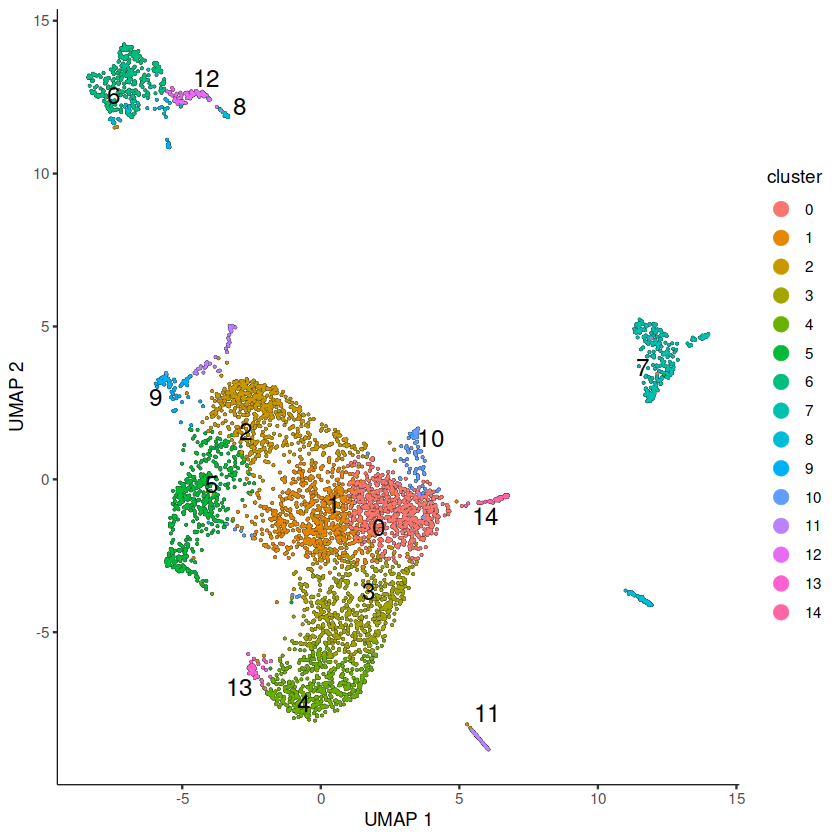

Cells aren't colored in a way that allows them to be grouped.



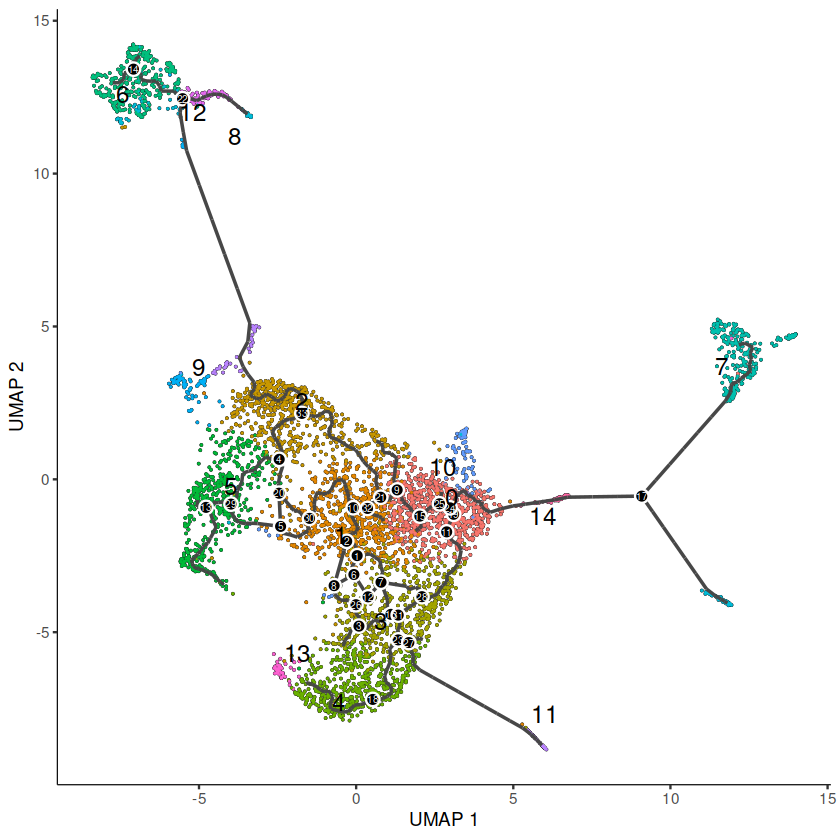

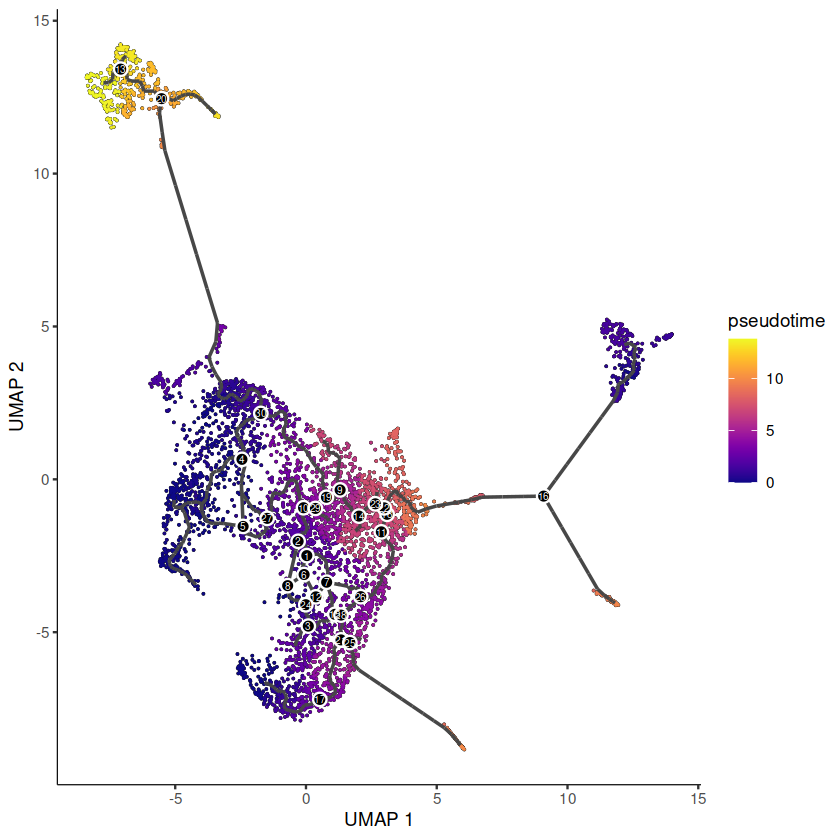

In [75]:
## Retrieve clustering information from Surat object ##
recreate.partitions <- c(rep(1, length(cds@colData@rownames)))
names(recreate.partitions) <- cds@colData@rownames
recreate.partitions <- as.factor(recreate.partitions)
recreate.partitions

cds@clusters@listData[["UMAP"]][["partitions"]] <- recreate.partitions

## Assign cluster information ##
list.cluster <- data@active.ident
cds@clusters@listData[["UMAP"]][["clusters"]] <- list.cluster

## Assign UMAP coordinates ##
cds@int_colData@listData[["reducedDims"]]@listData[["UMAP"]] <- data@reductions$umap@cell.embeddings

## plot ##
cluster.before.traj <-plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F, 
           group_label_size = 5) + theme(legend.position = "right")
## actual plot this time ##
cluster.before.traj

## Learn Trajectory ##
cds <- learn_graph(cds, use_partition = F)

## plotting the pseudotime ##
plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F,
           label_branch_points = T, label_roots = T, label_leaves = F,
           group_label_size = 5)

## order the cells is pseudotime ##
cds <- order_cells(cds, reduction_method = "UMAP", root_cells = colnames(cds[, clusters(cds) == 5]))
plot_cells(cds, color_cells_by = "pseudotime", label_groups_by_cluster = T,
           label_branch_points = T, label_roots = F, label_leaves = F)

11:14:09 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:14:09 Read 4379 rows and found 20 numeric columns

11:14:09 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:14:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:14:10 Writing NN index file to temp file /lscratch/13047421/RtmpDdvBae/file10582cf8ca089

11:14:10 Searching Annoy index using 1 thread, search_k = 3000

11:14:11 Annoy recall = 100%

11:14:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:14:14 Initializing from normalize

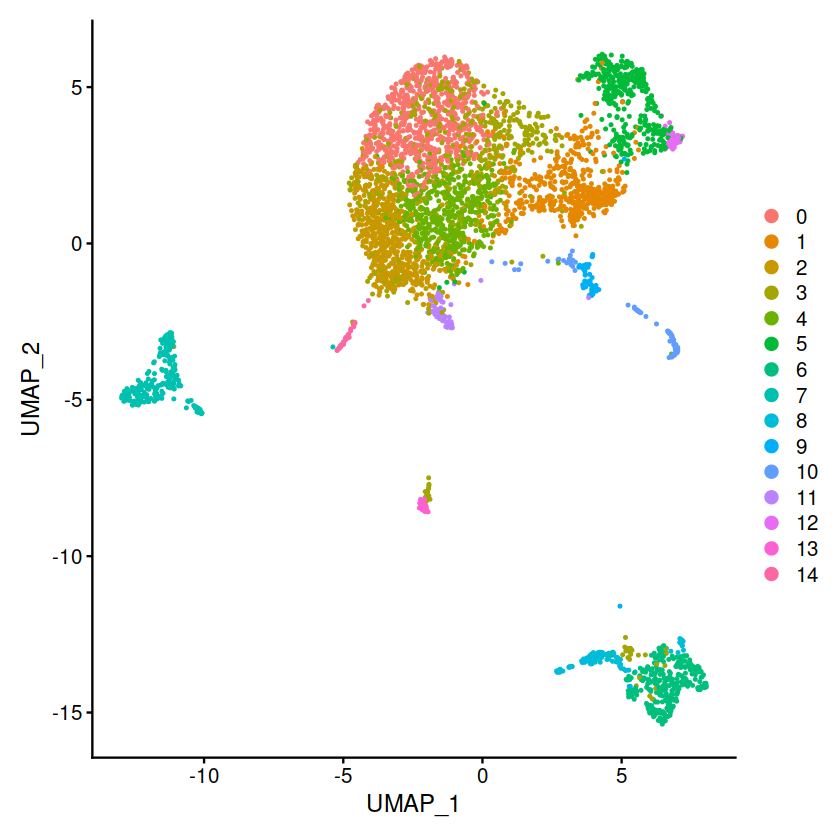

In [76]:
### the second way when you have already your seurat object ####

### This object has been cell cycle rgressed out ###
seurat.obj <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2497/alternate/SCAF2497_cell_cycle_regress_difference_out.rds")

## to see at which resolution clusters are formed
#str(seurat.obj)
#seurat.obj[[]]

## set the identity to the clusters
Idents(seurat.obj) <- "RNA_snn_res.0.8"
data <- RunUMAP(seurat.obj, dims = 1:20)
DimPlot(seurat.obj, reduction = "umap")

In [77]:
## Monocle analysis starts here ##
## seurat wrapper function is required to convert seurat object to monocle dataset (as.cell_data_set)
cds <- as.cell_data_set(seurat.obj)

## Getting features of the dataset 
head(colData(cds))
head(counts(cds))
cds@colData@rownames
fData(cds)
rownames(fData(cds))[1:10]
fData(cds)$gene_short_name <- rownames(fData(cds))
head(fData(cds))

DataFrame with 6 rows and 17 columns
                   orig.ident nCount_RNA nFeature_RNA percent.mt    S.Score
                     <factor>  <numeric>    <integer>  <numeric>  <numeric>
AAACCTGAGAGCAATT-1       SCLC       1460          971    4.24658 -0.1419719
AAACCTGAGCCATCGC-1       SCLC        843          559    2.13523 -0.1135590
AAACCTGAGCCTTGAT-1       SCLC       1890         1406    4.17989 -0.2351381
AAACCTGAGGAGTAGA-1       SCLC        569          442    1.40598  0.1500660
AAACCTGCAATGAAAC-1       SCLC        801          570    2.99625 -0.1412071
AAACCTGCAGTTCATG-1       SCLC       2367         1138    3.71779  0.0741344
                      G2M.Score       Phase old.ident CC.Difference
                      <numeric> <character>  <factor>     <numeric>
AAACCTGAGAGCAATT-1 -0.063705558          G1      SCLC    -0.0782664
AAACCTGAGCCATCGC-1  0.334284477         G2M      SCLC    -0.4478435
AAACCTGAGCCTTGAT-1 -0.148909086          G1      SCLC    -0.0862290
AAACCTGAGGAGTAG

  [[ suppressing 4379 column names ‘AAACCTGAGAGCAATT-1’, ‘AAACCTGAGCCATCGC-1’, ‘AAACCTGAGCCTTGAT-1’ ... ]]



6 x 4379 sparse Matrix of class "dgCMatrix"
                                                                              
AL627309.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.5 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AP006222.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL732372.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
LINC01409  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                                                              
AL627309.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.5 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AP006222.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL732372

[1] "AAACCTGAGAGCAATT-1" "AAACCTGAGCCATCGC-1" "AAACCTGAGCCTTGAT-1"
   [4] "AAACCTGAGGAGTAGA-1" "AAACCTGCAATGAAAC-1" "AAACCTGCAGTTCATG-1"
   [7] "AAACCTGCATCACCCT-1" "AAACCTGGTTAGTGGG-1" "AAACCTGTCCAACCAA-1"
  [10] "AAACCTGTCGGCCGAT-1" "AAACGGGAGGTACTCT-1" "AAACGGGCAGGAATGC-1"
  [13] "AAACGGGGTCATATGC-1" "AAACGGGGTGATGCCC-1" "AAACGGGGTGGCAAAC-1"
  [16] "AAACGGGGTTCGCTAA-1" "AAACGGGTCAGGCAAG-1" "AAAGATGAGAAGGCCT-1"
  [19] "AAAGATGAGGCAGTCA-1" "AAAGATGCACATCTTT-1" "AAAGATGCACGTCAGC-1"
  [22] "AAAGATGGTCCGTGAC-1" "AAAGATGGTGCACGAA-1" "AAAGATGGTGTAACGG-1"
  [25] "AAAGATGTCGGCTACG-1" "AAAGCAACAGTATGCT-1" "AAAGCAACATGCTAGT-1"
  [28] "AAAGCAACATGGAATA-1" "AAAGCAAGTTGGTTTG-1" "AAAGCAATCACCTCGT-1"
  [31] "AAAGCAATCGCGTTTC-1" "AAAGCAATCTTGACGA-1" "AAAGTAGAGAAGAAGC-1"
  [34] "AAAGTAGAGTGGAGAA-1" "AAAGTAGCACCAACCG-1" "AAAGTAGCACCAGGCT-1"
  [37] "AAAGTAGGTAGGCATG-1" "AAAGTAGTCCGGGTGT-1" "AAATGCCAGCCAGTAG-1"
  [40] "AAATGCCGTAAAGGAG-1" "AAATGCCGTATGGTTC-1" "AAATGCCTCAACACAC-1"
  [43] "AAATGCCTCATTCACT-1" "AAATGCCTCTATCCCG-1" "AAATGCCTCTCTAGGA-1"
  [46] "AACACGTCACTGTTAG-1" "AACACGTCATGTCCTC-1" "AACCATGCAAGACGTG-1"
  [49] "AACCATGCACGTCTCT-1" "AACCATGGTGACCAAG-1" "AACCATGTCACCCGAG-1"
  [52] "AACCATGTCCGCTGTT-1" "AACCGCGAGAGGACGG-1" "AACCGCGAGCCAGGAT-1"
  [55] "AACCGCGAGGAATTAC-1" "AACCGCGCAAGAAGAG-1" "AACCGCGGTAGTACCT-1"
  [58] "AACCGCGTCAGCAACT-1" "AACCGCGTCCCTGACT-1" "AACCGCGTCTTGTATC-1"
  [61] "AACGTTGAGGAGCGTT-1" "AACGTTGAGTTAGCGG-1" "AACGTTGCAAAGTCAA-1"
  [64] "AACGTTGCAAATCCGT-1" "AACGTTGCAACGCACC-1" "AACGTTGCAGCGAACA-1"
  [67] "AACGTTGCAGGAACGT-1" "AACGTTGCATTGCGGC-1" "AACGTTGTCGCCATAA-1"
  [70] "AACGTTGTCGCTTGTC-1" "AACTCAGAGAAGGACA-1" "AACTCAGCACAGACAG-1"
  [73] "AACTCAGCATCCCATC-1" "AACTCAGGTGATGCCC-1" "AACTCAGTCTCCTATA-1"
  [76] "AACTCCCAGCTAGGCA-1" "AACTCCCAGCTGTTCA-1" "AACTCCCCACAGCCCA-1"
  [79] "AACTCCCCAGTCTTCC-1" "AACTCCCCATTTGCCC-1" "AACTCCCGTAAACGCG-1"
  [82] "AACTCCCGTATCGCAT-1" "AACTCCCGTCAATACC-1" "AACTCCCGTGTCTGAT-1"
  [85] "AACTCCCTCGAGGTAG-1" "AACTCCCTCTGCGGCA-1" "AACTCCCTCTTACCTA-1"
  [88] "AACTCTTAGGGAGTAA-1" "AACTCTTCAGGAATCG-1" "AACTCTTGTAGAGCTG-1"
  [91] "AACTCTTGTGAGTGAC-1" "AACTCTTGTGATGTGG-1" "AACTCTTGTTCGAATC-1"
  [94] "AACTCTTTCCAGAGGA-1" "AACTCTTTCCAGATCA-1" "AACTCTTTCCTCAACC-1"
  [97] "AACTCTTTCGTACCGG-1" "AACTCTTTCTGGCGAC-1" "AACTGGTAGAGTTGGC-1"
 [100] "AACTGGTAGCCACGCT-1" "AACTGGTAGTTGCAGG-1" "AACTGGTCAGATGGCA-1"
 [103] "AACTGGTGTATCACCA-1" "AACTGGTGTCACTTCC-1" "AACTGGTGTCGGATCC-1"
 [106] "AACTGGTGTGTTGGGA-1" "AACTGGTGTTCGTTGA-1" "AACTGGTTCACCTTAT-1"
 [109] "AACTGGTTCACTCCTG-1" "AACTGGTTCGAATGCT-1" "AACTGGTTCTTTACGT-1"
 [112] "AACTTTCAGCGAGAAA-1" "AACTTTCAGGACACCA-1" "AACTTTCAGTCATCCA-1"
 [115] "AACTTTCAGTCGTTTG-1" "AACTTTCCAAGTCTGT-1" "AACTTTCCATGCCACG-1"
 [118] "AACTTTCGTAAGTGGC-1" "AACTTTCGTAGCGTCC-1" "AAGACCTCACAACGCC-1"
 [121] "AAGACCTCACTGTCGG-1" "AAGACCTGTAAATGTG-1" "AAGACCTGTTGTCGCG-1"
 [124] "AAGACCTTCAACTCTT-1" "AAGACCTTCCGTAGTA-1" "AAGACCTTCTATGTGG-1"
 [127] "AAGACCTTCTGCCAGG-1" "AAGCCGCAGACACGAC-1" "AAGCCGCAGAGGGCTT-1"
 [130] "AAGCCGCAGGCTACGA-1" "AAGCCGCAGTGACATA-1" "AAGCCGCCAAATCCGT-1"
 [133] "AAGCCGCCAATGGATA-1" "AAGCCGCCACCTATCC-1" "AAGCCGCGTAAGGATT-1"
 [136] "AAGCCGCGTCATATGC-1" "AAGCCGCTCCCTTGTG-1" "AAGCCGCTCGGTGTTA-1"
 [139] "AAGCCGCTCGTCGTTC-1" "AAGCCGCTCTCGCATC-1" "AAGGAGCCACTGCCAG-1"
 [142] "AAGGAGCCATAACCTG-1" "AAGGAGCGTGTCGCTG-1" "AAGGAGCGTTAAAGTG-1"
 [145] "AAGGAGCGTTACCGAT-1" "AAGGAGCTCACGAAGG-1" "AAGGAGCTCTTAGCCC-1"
 [148] "AAGGCAGAGGGATACC-1" "AAGGCAGAGGGTCTCC-1" "AAGGCAGAGTGAATTG-1"
 [151] "AAGGCAGAGTGACTCT-1" "AAGGCAGCAGATGAGC-1" "AAGGCAGGTACGACCC-1"
 [154] "AAGGCAGGTTCCACGG-1" "AAGGCAGTCGAATCCA-1" "AAGGTTCAGAAACCGC-1"
 [157] "AAGGTTCCAAGCTGTT-1" "AAGGTTCGTAAGGGAA-1" "AAGGTTCGTACTCTCC-1"
 [160] "AAGGTTCGTAGAGCTG-1" "AAGGTTCTCCGAGCCA-1" "AAGGTTCTCGATCCCT-1"
 [163] "AAGGTTCTCGCAGGCT-1" "AAGGTTCTCGTTACGA-1" "AAGTCTGAGACAAAGG-1"
 [166] "AAGTCTGAGGGAACGG-1" "AAGTCTGCAACCGCCA-1" "AAGTCTGCAAGGACTG-1"
 [169] "AAGTCTGCACTTCTGC-1" "AAGTCTGGTATCTGCA-1" "AAGTCTGGTATGAATG-1"
 [172] "AAGTC

DataFrame with 24729 rows and 0 columns

[1] "AL627309.1" "AL627309.3" "AL627309.5" "AP006222.2" "AL732372.1"
 [6] "LINC01409"  "FAM87B"     "LINC01128"  "LINC00115"  "FAM41C"

DataFrame with 6 rows and 1 column
           gene_short_name
               <character>
AL627309.1      AL627309.1
AL627309.3      AL627309.3
AL627309.5      AL627309.5
AP006222.2      AP006222.2
AL732372.1      AL732372.1
LINC01409        LINC01409

In [78]:
## Retrieve clustering information from Surat object ##
## First create the partition of the monocle object 
recreate.partitions <- c(rep(1, length(cds@colData@rownames)))
names(recreate.partitions) <- cds@colData@rownames
recreate.partitions <- as.factor(recreate.partitions)
recreate.partitions

cds@clusters@listData[["UMAP"]][["partitions"]] <- recreate.partitions


AAACCTGAGAGCAATT-1 AAACCTGAGCCATCGC-1 AAACCTGAGCCTTGAT-1 AAACCTGAGGAGTAGA-1 
                 1                  1                  1                  1 
AAACCTGCAATGAAAC-1 AAACCTGCAGTTCATG-1 AAACCTGCATCACCCT-1 AAACCTGGTTAGTGGG-1 
                 1                  1                  1                  1 
AAACCTGTCCAACCAA-1 AAACCTGTCGGCCGAT-1 AAACGGGAGGTACTCT-1 AAACGGGCAGGAATGC-1 
                 1                  1                  1                  1 
AAACGGGGTCATATGC-1 AAACGGGGTGATGCCC-1 AAACGGGGTGGCAAAC-1 AAACGGGGTTCGCTAA-1 
                 1                  1                  1                  1 
AAACGGGTCAGGCAAG-1 AAAGATGAGAAGGCCT-1 AAAGATGAGGCAGTCA-1 AAAGATGCACATCTTT-1 
                 1                  1                  1                  1 
AAAGATGCACGTCAGC-1 AAAGATGGTCCGTGAC-1 AAAGATGGTGCACGAA-1 AAAGATGGTGTAACGG-1 
                 1                  1                  1                  1 
AAAGATGTCGGCTACG-1 AAAGCAACAGTATGCT-1 AAAGCAACATGCTAGT-1 AAAGCAACATGGAATA-1 
                 1                  1                  1                  1 
AAAGCAAGTTGGTTTG-1 AAAGCAATCACCTCGT-1 AAAGCAATCGCGTTTC-1 AAAGCAATCTTGACGA-1 
                 1                  1                  1                  1 
AAAGTAGAGAAGAAGC-1 AAAGTAGAGTGGAGAA-1 AAAGTAGCACCAACCG-1 AAAGTAGCACCAGGCT-1 
                 1                  1                  1                  1 
AAAGTAGGTAGGCATG-1 AAAGTAGTCCGGGTGT-1 AAATGCCAGCCAGTAG-1 AAATGCCGTAAAGGAG-1 
                 1                  1                  1                  1 
AAATGCCGTATGGTTC-1 AAATGCCTCAACACAC-1 AAATGCCTCATTCACT-1 AAATGCCTCTATCCCG-1 
                 1                  1                  1                  1 
AAATGCCTCTCTAGGA-1 AACACGTCACTGTTAG-1 AACACGTCATGTCCTC-1 AACCATGCAAGACGTG-1 
                 1                  1                  1                  1 
AACCATGCACGTCTCT-1 AACCATGGTGACCAAG-1 AACCATGTCACCCGAG-1 AACCATGTCCGCTGTT-1 
                 1                  1                  1                  1 
AACCGCGAGAGGACGG-1 AACCGCGAGCCAGGAT-1 AACCGCGAGGAATTAC-1 AACCGCGCAAGAAGAG-1 
                 1                  1                  1                  1 
AACCGCGGTAGTACCT-1 AACCGCGTCAGCAACT-1 AACCGCGTCCCTGACT-1 AACCGCGTCTTGTATC-1 
                 1                  1                  1                  1 
AACGTTGAGGAGCGTT-1 AACGTTGAGTTAGCGG-1 AACGTTGCAAAGTCAA-1 AACGTTGCAAATCCGT-1 
                 1                  1                  1                  1 
AACGTTGCAACGCACC-1 AACGTTGCAGCGAACA-1 AACGTTGCAGGAACGT-1 AACGTTGCATTGCGGC-1 
                 1                  1                  1                  1 
AACGTTGTCGCCATAA-1 AACGTTGTCGCTTGTC-1 AACTCAGAGAAGGACA-1 AACTCAGCACAGACAG-1 
                 1                  1                  1                  1 
AACTCAGCATCCCATC-1 AACTCAGGTGATGCCC-1 AACTCAGTCTCCTATA-1 AACTCCCAGCTAGGCA-1 
                 1                  1                  1                  1 
AACTCCCAGCTGTTCA-1 AACTCCCCACAGCCCA-1 AACTCCCCAGTCTTCC-1 AACTCCCCATTTGCCC-1 
                 1                  1                  1                  1 
AACTCCCGTAAACGCG-1 AACTCCCGTATCGCAT-1 AACTCCCGTCAATACC-1 AACTCCCGTGTCTGAT-1 
                 1                  1                  1                  1 
AACTCCCTCGAGGTAG-1 AACTCCCTCTGCGGCA-1 AACTCCCTCTTACCTA-1 AACTCTTAGGGAGTAA-1 
                 1                  1                  1                  1 
AACTCTTCAGGAATCG-1 AACTCTTGTAGAGCTG-1 AACTCTTGTGAGTGAC-1 AACTCTTGTGATGTGG-1 
                 1                  1                  1                  1 
AACTCTTGTTCGAATC-1 AACTCTTTCCAGAGGA-1 AACTCTTTCCAGATCA-1 AACTCTTTCCTCAACC-1 
                 1                  1                  1                  1 
AACTCTTTCGTACCGG-1 AACTCTTTCTGGCGAC-1 AACTGGTAGAGTTGGC-1 AACTGGTAGCCACGCT-1 
                 1                  1                  1                  1 
AACTGGTAGTTGCAGG-1 AACTGGTCAGATGGCA-1 AACTGGTGTATCACCA-1 AACTGGTGTCACTTCC-1 
                 1                  1                  1                 

No trajectory to plot. Has learn_graph() been called yet?



  |======================================================================| 100%


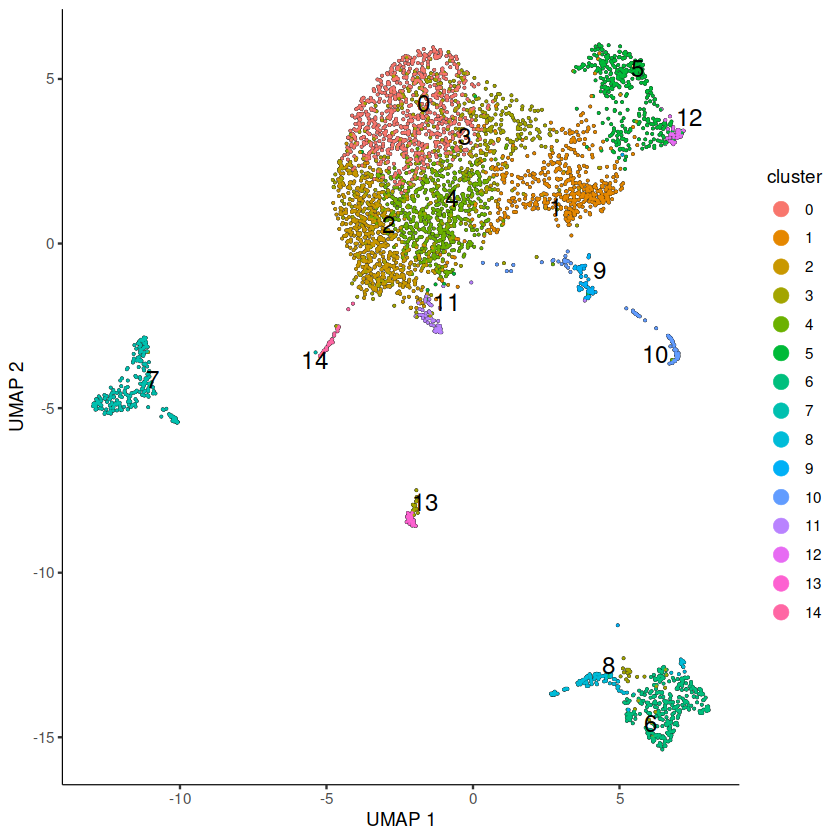

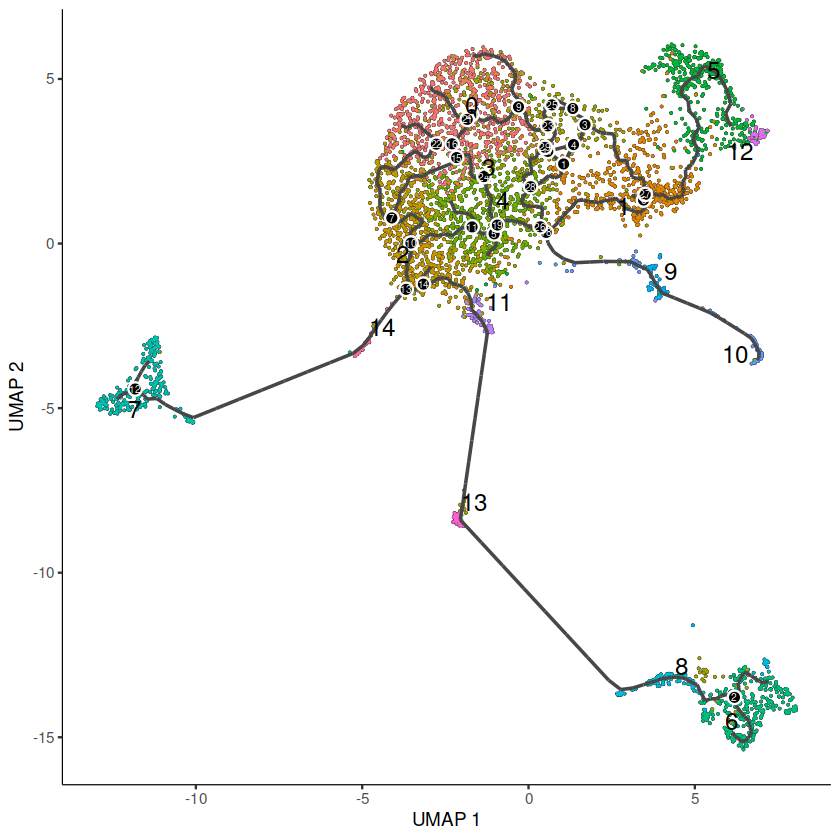

In [79]:
### Assign partitions cluster information from the seurat object to monocle object ###
list.cluster <- seurat.obj@active.ident
cds@clusters@listData[["UMAP"]][["clusters"]] <- list.cluster

### Assign UMAP coordinates ###
cds@int_colData@listData[["reducedDims"]]@listData[["UMAP"]] <- seurat.obj@reductions$umap@cell.embeddings

## plot ##
cluster.before.traj <-plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F, 
           group_label_size = 5) + theme(legend.position = "right")

## Actual plot here ###
cluster.before.traj

### Learn Trajectory ###
cds <- learn_graph(cds, use_partition = F)

### Actual trajectory plot ###

plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F,
           label_branch_points = T, label_roots = T, label_leaves = F,
           group_label_size = 5)


In [91]:
### saving plot ##
png("/data/kumarr9/scRNA/scRNA_results/monocle_result/SCAF2497_trajectory.jpg", width = 3000, height = 2000, res=300)
plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F,
           label_branch_points = T, label_roots = T, label_leaves = F,
           group_label_size = 5)
dev.off()

png 
  2

Cells aren't colored in a way that allows them to be grouped.



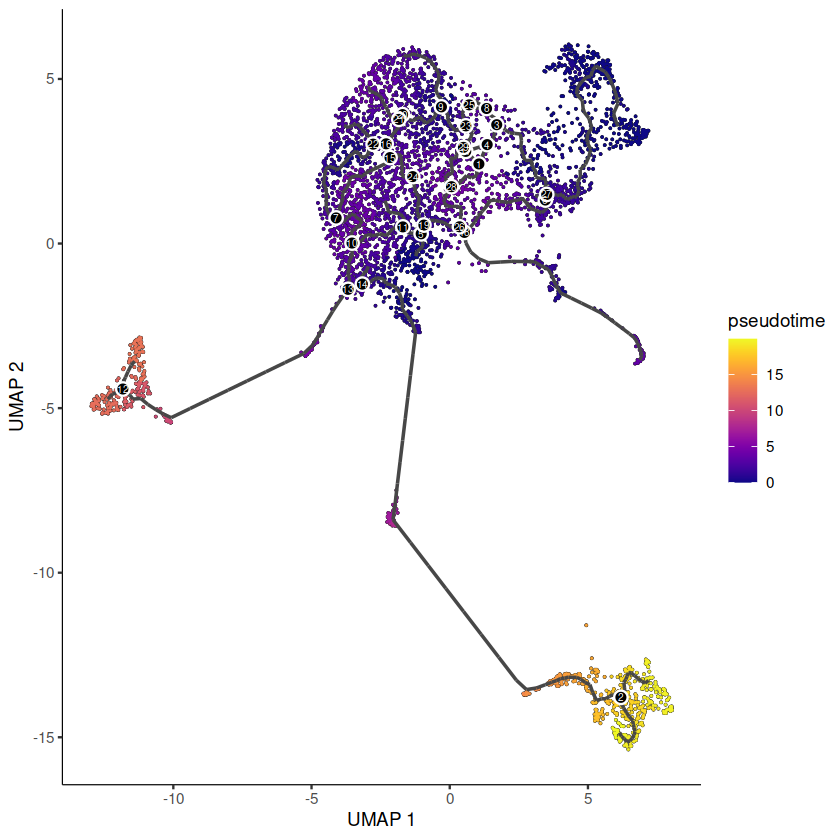

In [80]:
### Order cells in Pseudotime ###
cds <- order_cells(cds, reduction_method = "UMAP", root_cells = colnames(cds[, clusters(cds) == 5]))
plot_cells(cds, color_cells_by = "pseudotime", label_groups_by_cluster = T,
           label_branch_points = T, label_roots = F, label_leaves = F)

In [94]:
## saving plot ##
png("/data/kumarr9/scRNA/scRNA_results/monocle_result/SCAF2497_trajectory_ordred.jpg", width = 3000, height = 2000, res=300)
cds <- order_cells(cds, reduction_method = "UMAP", root_cells = colnames(cds[, clusters(cds) == 5]))
plot_cells(cds, color_cells_by = "pseudotime", label_groups_by_cluster = T,
           label_branch_points = T, label_roots = F, label_leaves = F)
dev.off()

Cells aren't colored in a way that allows them to be grouped.



png 
  2

In [81]:
### Cells ordered by Monocle3 Pseudotime ###
head(pseudotime(cds), 10)

AAACCTGAGAGCAATT-1 AAACCTGAGCCATCGC-1 AAACCTGAGCCTTGAT-1 AAACCTGAGGAGTAGA-1 
         1.8829840          0.5589170          0.5589714          2.9643550 
AAACCTGCAATGAAAC-1 AAACCTGCAGTTCATG-1 AAACCTGCATCACCCT-1 AAACCTGGTTAGTGGG-1 
         3.0290938          2.4481687          3.9063142          0.0010530 
AAACCTGTCCAACCAA-1 AAACCTGTCGGCCGAT-1 
         1.7720381          2.1621586

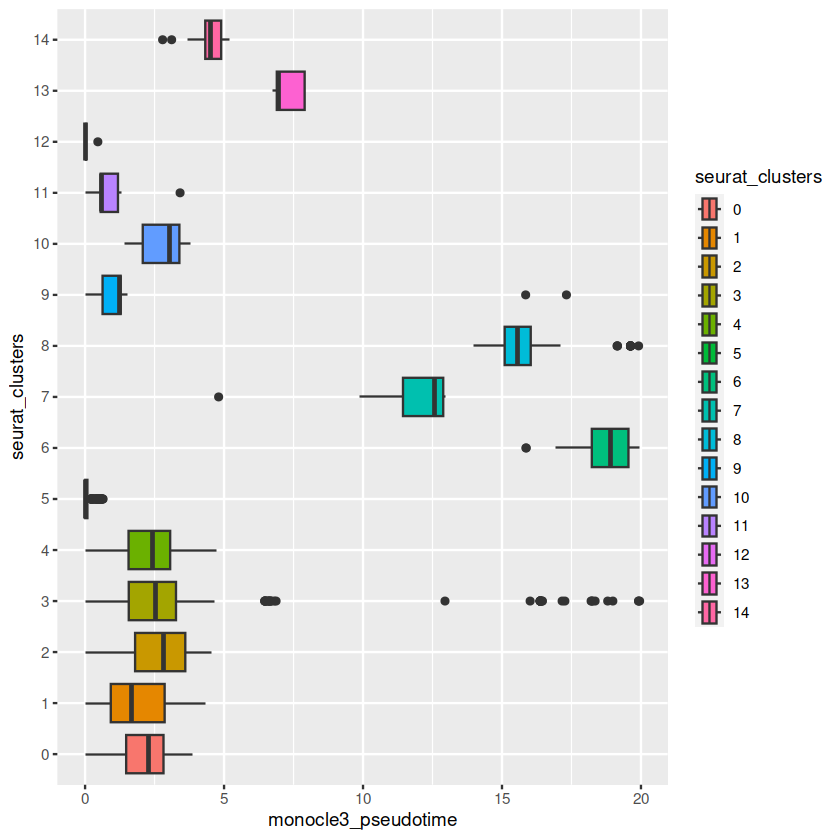

In [87]:
### Plotting in the form bar plot ###
cds$monocle3_pseudotime <- pseudotime(cds)
data.pseudo <- as.data.frame(colData(cds))

ggplot(data.pseudo, aes(monocle3_pseudotime, seurat_clusters, fill = seurat_clusters)) + geom_boxplot()

### when want to plot with little or no background ### add + theme_minimal() or + theme_classic() in ggplot line 

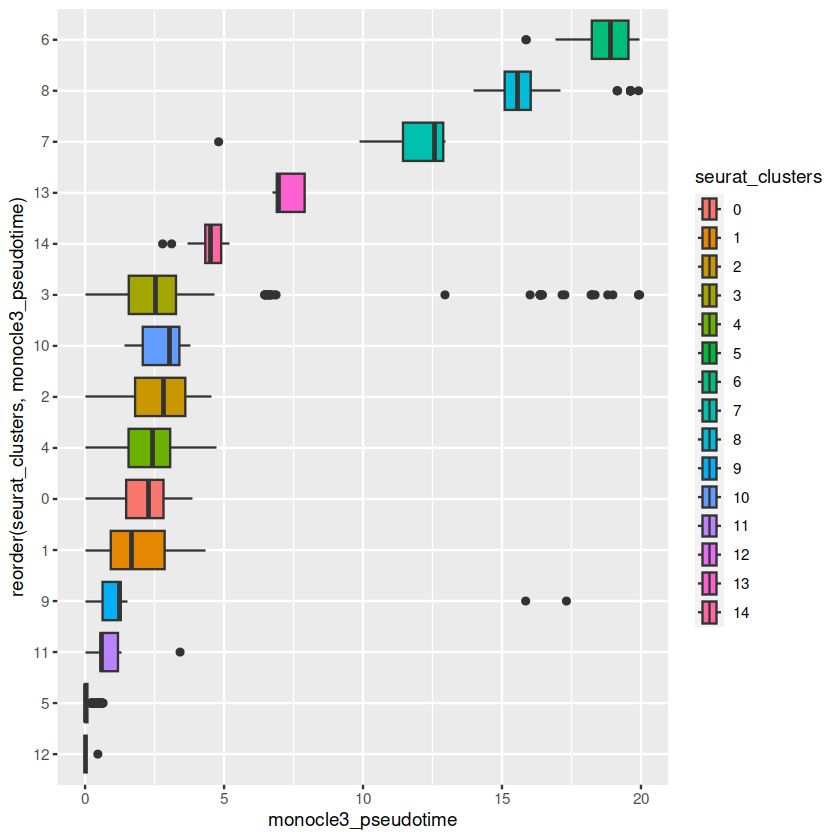

In [88]:
ggplot(data.pseudo, aes(monocle3_pseudotime, reorder(seurat_clusters, monocle3_pseudotime), fill = seurat_clusters)) + geom_boxplot()

In [97]:
### Find genes that change as a function of pseudotime ###
deg <- graph_test(cds, neighbor_graph = "principal_graph")
deg %>% arrange(q_value) %>% filter(status == "OK") %>% head()
FeaturePlot(data, features = c("ASCL1", "NEUROD1", "POU2F3", "YAP1", "INSM1"))

  |==============================                             |  51%, ETA 04:37

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

